In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("results/nels_etas_11-16-22_seed_0_gradient_type_partial_deriv_loss_beta_train.csv")
df2 = pd.read_csv("results/nels_etas_11-16-22_seed_0_gradient_type_total_deriv_train.csv")
df3 = pd.read_csv("results/nels_etas_11-16-22_seed_0_gradient_type_expected_gradient_beta_naive_train.csv")

In [3]:
df4 = pd.read_csv("results/nels_months_attended_11-16-22_seed_0_gradient_type_partial_deriv_loss_beta_train.csv")
df5 = pd.read_csv("results/nels_months_attended_11-16-22_seed_0_gradient_type_total_deriv_train.csv")
df6 = pd.read_csv("results/nels_months_attended_11-16-22_seed_0_gradient_type_expected_gradient_beta_naive_train.csv")

In [4]:
def conversion_method(arr):
    l = []
    for s in arr:
        t = s[1:-1].split(", ")
        t = [float(x) for x in t]
        l.append(np.array(t).reshape(10, 1))
    return l

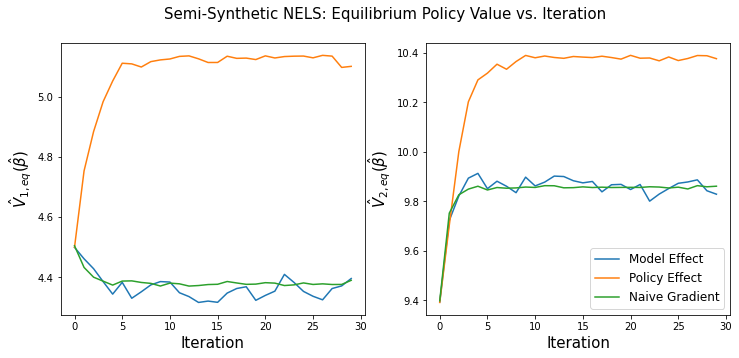

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(df4["iteration"], -df4["loss"], label="Model Effect")
ax[0].plot(df5["iteration"], -df5["loss"], label="Policy Effect")
ax[0].plot(df6["iteration"], -df6["loss"], label="Naive Gradient")
ax[1].plot(df1["iteration"], -df1["loss"], label="Model Effect")
ax[1].plot(df2["iteration"], -df2["loss"], label="Policy Effect")
ax[1].plot(df3["iteration"], -df3["loss"], label="Naive Gradient")
ax[0].set_xlabel("Iteration", fontsize=15)
ax[1].set_xlabel("Iteration", fontsize=15)
ax[0].set_ylabel(r"$\hat{V}_{1,eq}(\hat{\beta})$", fontsize=15)
ax[1].set_ylabel(r"$\hat{V}_{2,eq}(\hat{\beta})$", fontsize=15)
plt.legend(fontsize=12)
plt.suptitle("Semi-Synthetic NELS: Equilibrium Policy Value vs. Iteration", fontsize=15)
plt.savefig("figs/paper-figure-6.pdf", bbox_inches='tight')